In [1]:
import praw
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [51]:
class PRAWW:
    common_words = ["http","https","com","www","imgur","r","a","about","all","are","an","also","and","as","at","be","because","but","by","can","come","could","day","do","deleted","even","find","first","for","from","get","give","go","have","he","her","here","him","has","his","how","i","is","if","in","into","it","its","it's","i'm","just","know","like","look","make","man","many","me","more","my","new","no","not","now","of","on","one","only","or","other","our","out","people","say","see","she","so","some","take","tell","than","that","the","their","them","then","there","these","they","thing","think","this","those","time","to","two","up","use","very","want","was","way","we","were","well","what","when","which","who","will","with","would","year","you","your"]

    def __init__(self):
        self.reddit = praw.Reddit(client_id='Wa_QQy6c8J6w_Q',
                     client_secret='i7XCwT6iYlE4O1wLqjJCfDRsFV0',
                     user_agent='diggity_diggity_doge')
        self.word_count = 0

    def get_comments_top_year(self, subreddit, number, group):
        texts = []
        labels = []
        for submission in self.reddit.subreddit(subreddit).top('year', limit=number):
            submission.comment_sort = 'top'
            submission.comments.replace_more(limit=0)
            for top_level_comment in submission.comments:
                texts.append(self.parse_comment(top_level_comment.body))
                labels.append(group)
        return (texts, labels)

    def get_comments_top_all(self, subreddit, number, group):
        texts = []
        labels = []
        for submission in self.reddit.subreddit(subreddit).top(limit=number):
            submission.comment_sort = 'top'
            submission.comments.replace_more(limit=0)
            for top_level_comment in submission.comments:
                texts.append(self.parse_comment(top_level_comment.body))
                labels.append(group)
        return (texts, labels)

    def get_comments_hot(self, subreddit, number, group):
        texts = []
        labels = []
        for submission in self.reddit.subreddit(subreddit).hot(limit=number):
            submission.comment_sort = 'top'
            submission.comments.replace_more(limit=0)
            for top_level_comment in submission.comments:
                texts.append(self.parse_comment(top_level_comment.body))
                labels.append(group)
        return (texts, labels)
    

    def parse_comment(self, comment):
        comment_arr = []
        new_comment = comment.translate ({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
        for word in new_comment.split():
            self.word_count = self.word_count + 1
            if word.lower() not in self.common_words:
                comment_arr.append(word.lower())
        return " ".join(comment_arr)


    def tokenize_words(self, texts):
        max_words = 10000

        tokenizer = Tokenizer(num_words=max_words)
        tokenizer.fit_on_texts(texts)
        return tokenizer    

    def generate_occurance_data(self, tokenizer):
        word_counts = tokenizer.word_counts
        sorted_by_value = sorted(tokenizer.word_counts.items(), key=lambda kv: kv[1])

        data = pd.DataFrame(sorted_by_value, columns=['word', 'occurance']).tail(25)
        data['occurance'] = data['occurance']/self.word_count
        data.set_index("word",drop=True,inplace=True)
        return data


(3807, 1)


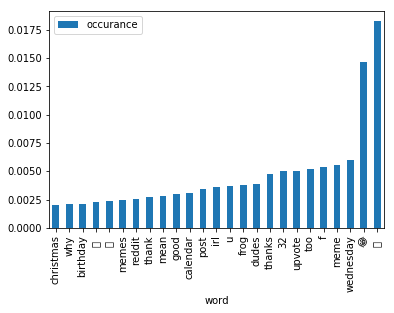

In [54]:
p = PRAWW()
(texts, labels) = p.get_comments_top_year('me_irl', 30, 0)
print(pd.DataFrame(texts).shape)
token = p.tokenize_words(texts)
data = p.generate_occurance_data(token)
data.plot(kind='bar')

In [16]:
data

820    0.002308
821    0.002308
822    0.002308
823    0.002692
824    0.002692
825    0.002692
826    0.002692
827    0.003077
828    0.003077
829    0.003077
830    0.003077
831    0.003462
832    0.003462
833    0.003462
834    0.004231
835    0.004231
836    0.004231
837    0.004615
838    0.004615
839    0.005000
840    0.005769
841    0.006154
842    0.006538
843    0.008077
844    0.009615
Name: count, dtype: float64